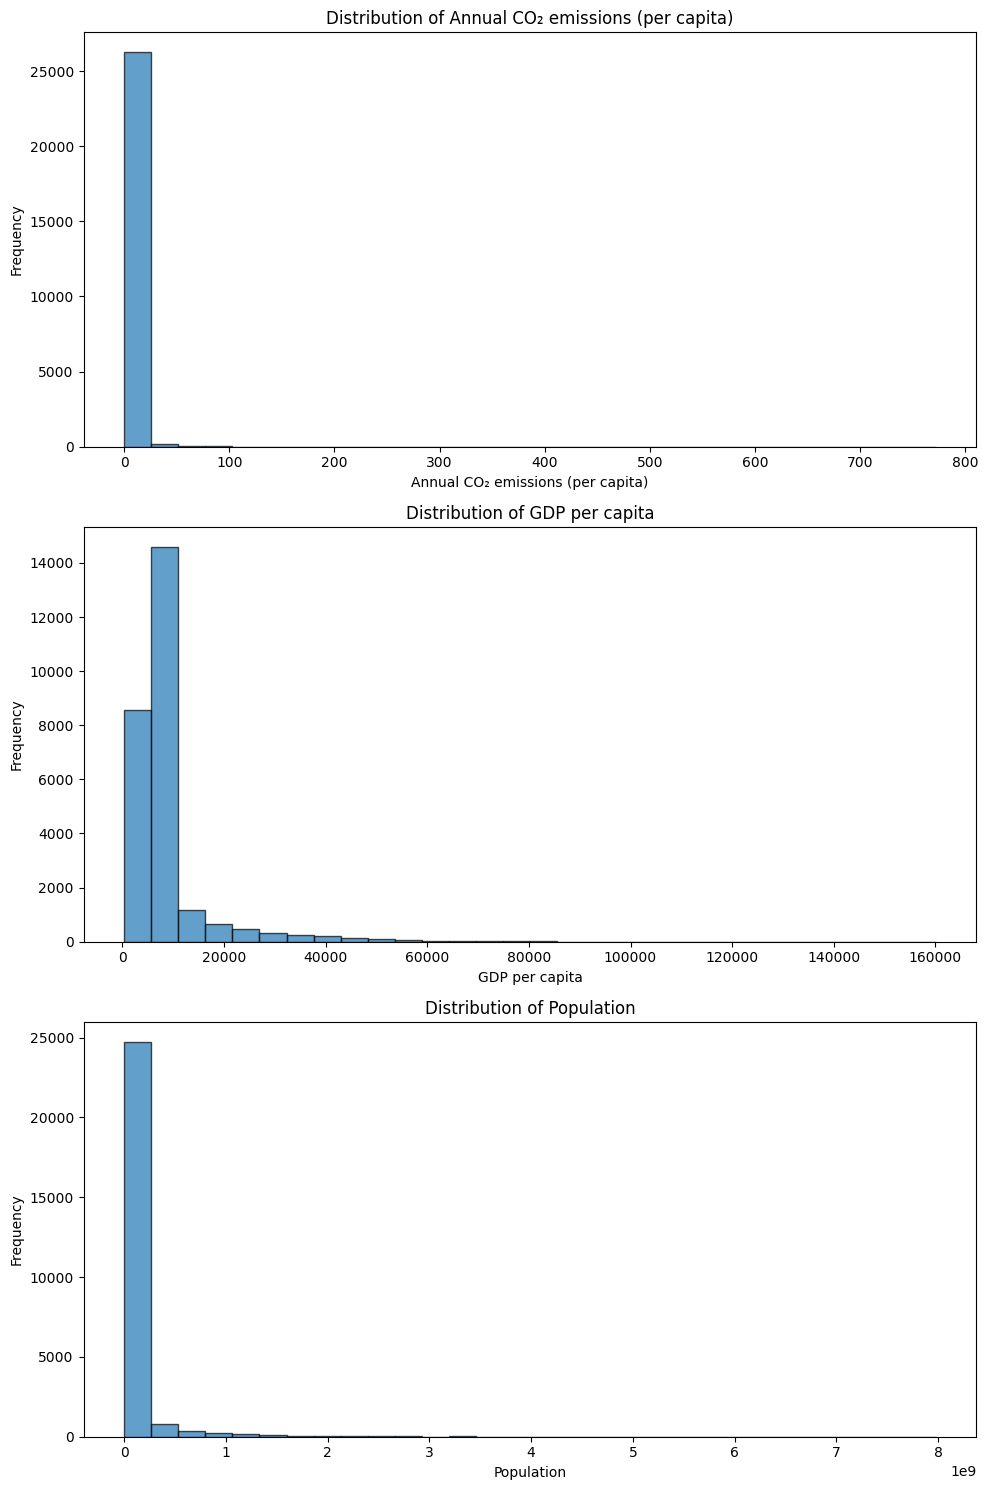

Summary Statistics of the Final Merged Data
               Year  Annual CO₂ emissions (per capita)  GDP per capita  \
count  26600.000000                       26600.000000    26600.000000   
mean    1949.096880                           3.711042     8894.721760   
std       56.387496                          14.295633     9036.352901   
min     1750.000000                           0.000000      377.580080   
25%     1915.000000                           0.132211     3725.000000   
50%     1963.000000                           0.933317     8894.721760   
75%     1994.000000                           4.150357     8894.721760   
max     2022.000000                         771.886500   160051.230000   

         Population  
count  2.660000e+04  
mean   9.214158e+07  
std    3.966299e+08  
min    1.480000e+03  
25%    1.221843e+06  
50%    5.509152e+06  
75%    3.010532e+07  
max    7.975105e+09  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the datasets
file_path_new = 'co-emissions-per-capita.csv'
population_file_path = 'population-regions.csv'
gdp_file_path = 'gdp-per-capita.csv'

data_new = pd.read_csv(file_path_new)
population_data = pd.read_csv(population_file_path)
gdp_data = pd.read_csv(gdp_file_path)

# Clean the GDP data by removing unnecessary columns and handling missing values
gdp_data = gdp_data[['Entity', 'Code', 'Year', 'GDP per capita']].copy()
gdp_data['GDP per capita'] = gdp_data['GDP per capita'].fillna(gdp_data['GDP per capita'].mean())

# Clean the population data by handling missing values
population_data = population_data[['Entity', 'Code', 'Year', 'Population']].copy()
population_data['Population'] = population_data['Population'].fillna(population_data['Population'].mean())

# Merge the datasets on 'Entity' and 'Year'
merged_data_final = data_new.merge(gdp_data, on=['Entity', 'Year'], how='left').merge(population_data, on=['Entity', 'Year'], how='left')

# Handle missing values by filling them with mean values
merged_data_final['GDP per capita'] = merged_data_final['GDP per capita'].fillna(merged_data_final['GDP per capita'].mean())
merged_data_final['Population'] = merged_data_final['Population'].fillna(merged_data_final['Population'].mean())

# Step 1: Exploratory Data Analysis (EDA)
summary_stats_final = merged_data_final.describe()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for Annual CO₂ emissions (per capita)
axs[0].hist(merged_data_final['Annual CO₂ emissions (per capita)'], bins=30, edgecolor='black', alpha=0.7)
axs[0].set_title('Distribution of Annual CO₂ emissions (per capita)')
axs[0].set_xlabel('Annual CO₂ emissions (per capita)')
axs[0].set_ylabel('Frequency')

# Histogram for GDP per capita
axs[1].hist(merged_data_final['GDP per capita'], bins=30, edgecolor='black', alpha=0.7)
axs[1].set_title('Distribution of GDP per capita')
axs[1].set_xlabel('GDP per capita')
axs[1].set_ylabel('Frequency')

# Histogram for Population
axs[2].hist(merged_data_final['Population'], bins=30, edgecolor='black', alpha=0.7)
axs[2].set_title('Distribution of Population')
axs[2].set_xlabel('Population')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics of the Final Merged Data")
print(summary_stats_final)


CO2 Emissions Data:
        Entity Code  Year  Annual CO₂ emissions (per capita)
0  Afghanistan  AFG  1949                           0.001992
1  Afghanistan  AFG  1950                           0.011266
2  Afghanistan  AFG  1951                           0.012098
3  Afghanistan  AFG  1952                           0.011946
4  Afghanistan  AFG  1953                           0.013685

Population Data:
        Entity Code   Year  Population
0  Afghanistan  AFG -10000       14737
1  Afghanistan  AFG  -9000       20405
2  Afghanistan  AFG  -8000       28253
3  Afghanistan  AFG  -7000       39120
4  Afghanistan  AFG  -6000       54166


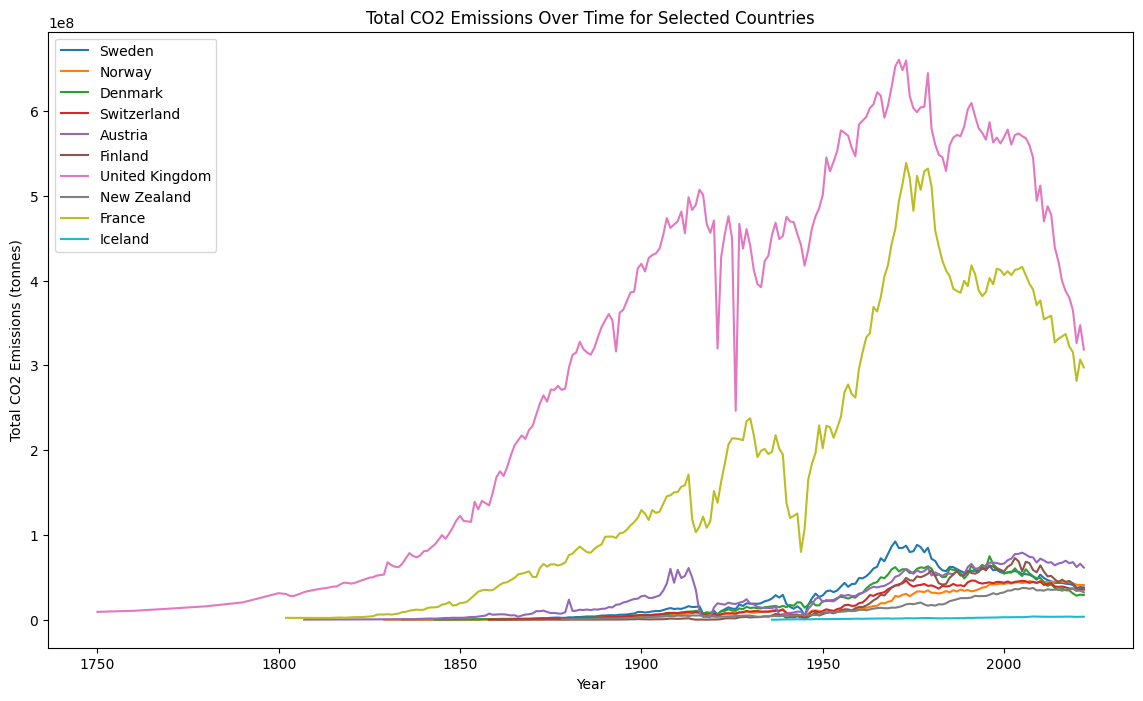

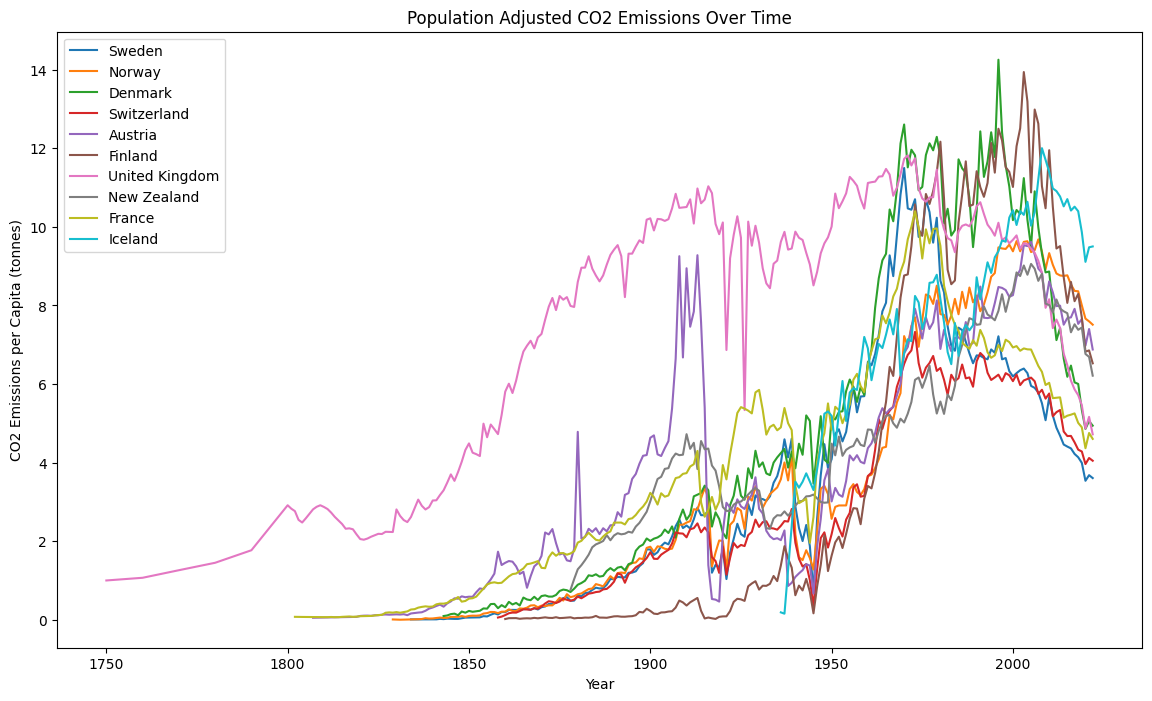

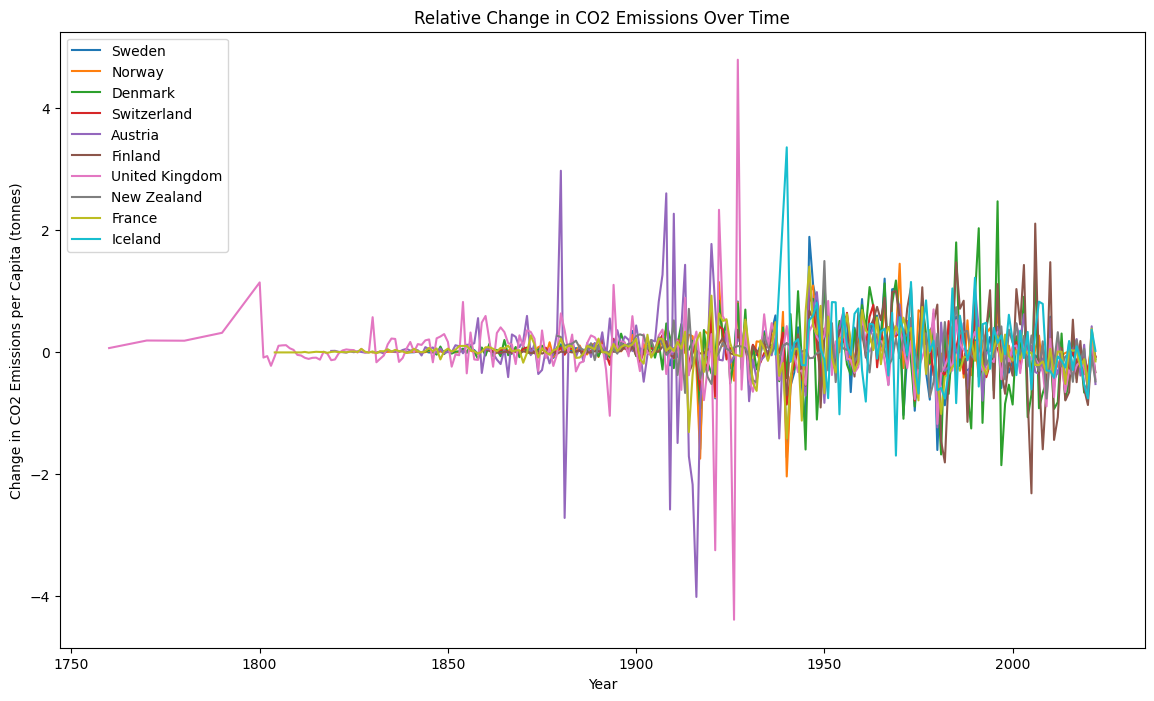

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_co2 = pd.read_csv("co-emissions-per-capita.csv")
df_population = pd.read_csv("population-regions.csv")

# Display the first few rows of each dataframe to understand their structure
print("CO2 Emissions Data:")
print(df_co2.head())
print("\nPopulation Data:")
print(df_population.head())

# Strip any whitespace from the column names
df_co2.columns = df_co2.columns.str.strip()
df_population.columns = df_population.columns.str.strip()

# Rename relevant columns for clarity
df_co2.rename(columns={'Annual CO₂ emissions (per capita)': 'CO2 per Capita'}, inplace=True)
df_population.rename(columns={'Population': 'Population'}, inplace=True)

# Drop unnecessary columns
df_co2.drop(['Code'], axis=1, inplace=True)
df_population.drop(['Code'], axis=1, inplace=True)

# Remove rows with negative values in relevant columns
df_co2 = df_co2[(df_co2['Year'] >= 0) & (df_co2['CO2 per Capita'] >= 0)]
df_population = df_population[(df_population['Year'] >= 0) & (df_population['Population'] >= 0)]

# Check and convert data types to ensure merging compatibility
df_co2['Year'] = df_co2['Year'].astype(int)
df_population['Year'] = df_population['Year'].astype(int)
df_co2['CO2 per Capita'] = df_co2['CO2 per Capita'].astype(float)
df_population['Population'] = df_population['Population'].astype(float)

# Merge dataframes based on 'Entity' and 'Year'
merged_df = pd.merge(df_co2, df_population, how='outer', on=['Entity', 'Year'])

# Drop rows with missing values
merged_df.dropna(subset=['CO2 per Capita', 'Population'], inplace=True)

# Calculate total CO2 emissions
merged_df['Total CO2'] = merged_df['CO2 per Capita'] * merged_df['Population']

# Calculate the change in CO2 per capita over time
merged_df = merged_df.sort_values(by=['Entity', 'Year'])
merged_df['CO2 per Capita Change'] = merged_df.groupby('Entity')['CO2 per Capita'].diff()

# Group by 'Entity' and calculate the total change in CO2 per capita
df_co2_change = merged_df.groupby('Entity').agg({'CO2 per Capita Change': 'sum'}).reset_index()

# Define the selected countries leading the energy transition
selected_countries = [
    'Sweden', 'Norway', 'Denmark', 'Switzerland', 'Austria', 
    'Finland', 'United Kingdom', 'New Zealand', 'France', 'Iceland'
]

# Filter the merged dataframe to include only the selected countries
df_selected = merged_df[merged_df['Entity'].isin(selected_countries)].copy()

# Function to plot total CO2 emissions over time for selected countries
def plot_total_co2_emissions(df, countries):
    plt.figure(figsize=(14, 8))
    for country in countries:
        country_data = df[df['Entity'] == country]
        plt.plot(country_data['Year'], country_data['Total CO2'], label=country)
    plt.xlabel('Year')
    plt.ylabel('Total CO2 Emissions (tonnes)')
    plt.title('Total CO2 Emissions Over Time for Selected Countries')
    plt.legend()
    plt.show()

# Function to plot population adjusted CO2 emissions over time for selected countries
def plot_co2_per_capita(df, countries):
    plt.figure(figsize=(14, 8))
    for country in countries:
        country_data = df[df['Entity'] == country]
        plt.plot(country_data['Year'], country_data['CO2 per Capita'], label=country)
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions per Capita (tonnes)')
    plt.title('Population Adjusted CO2 Emissions Over Time')
    plt.legend()
    plt.show()

# Function to plot relative change in CO2 emissions over time for selected countries
def plot_co2_per_capita_change(df, countries):
    plt.figure(figsize=(14, 8))
    for country in countries:
        country_data = df[df['Entity'] == country]
        plt.plot(country_data['Year'], country_data['CO2 per Capita Change'], label=country)
    plt.xlabel('Year')
    plt.ylabel('Change in CO2 Emissions per Capita (tonnes)')
    plt.title('Relative Change in CO2 Emissions Over Time')
    plt.legend()
    plt.show()

# Plotting the graphs
plot_total_co2_emissions(df_selected, selected_countries)
plot_co2_per_capita(df_selected, selected_countries)
plot_co2_per_capita_change(df_selected, selected_countries)

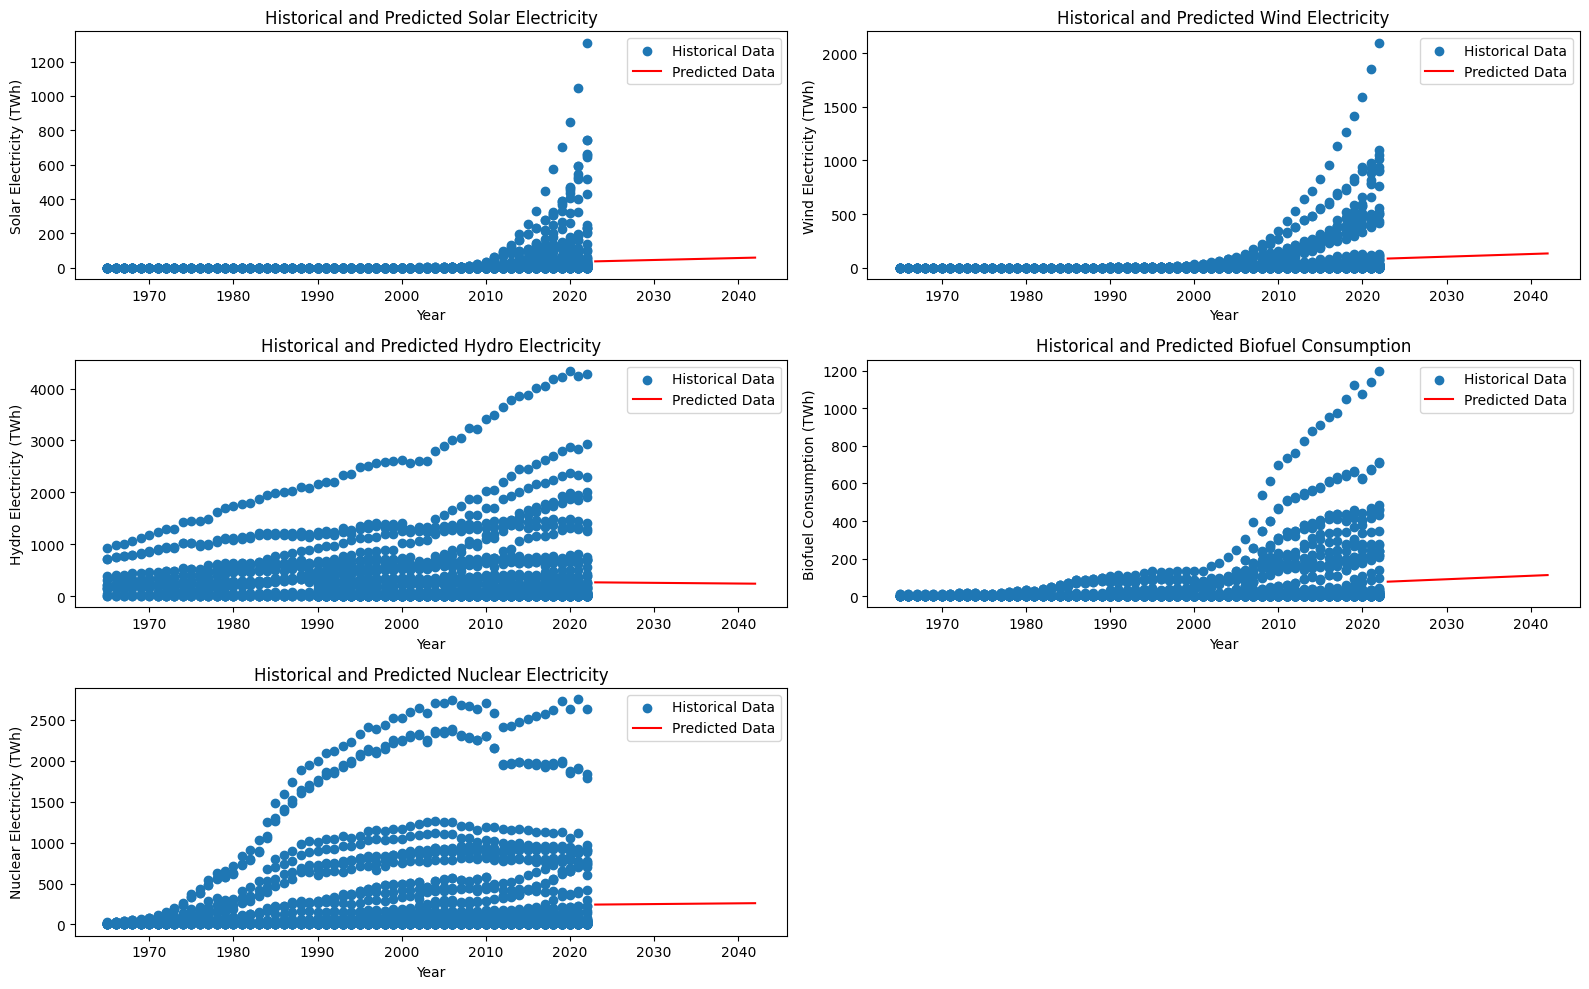

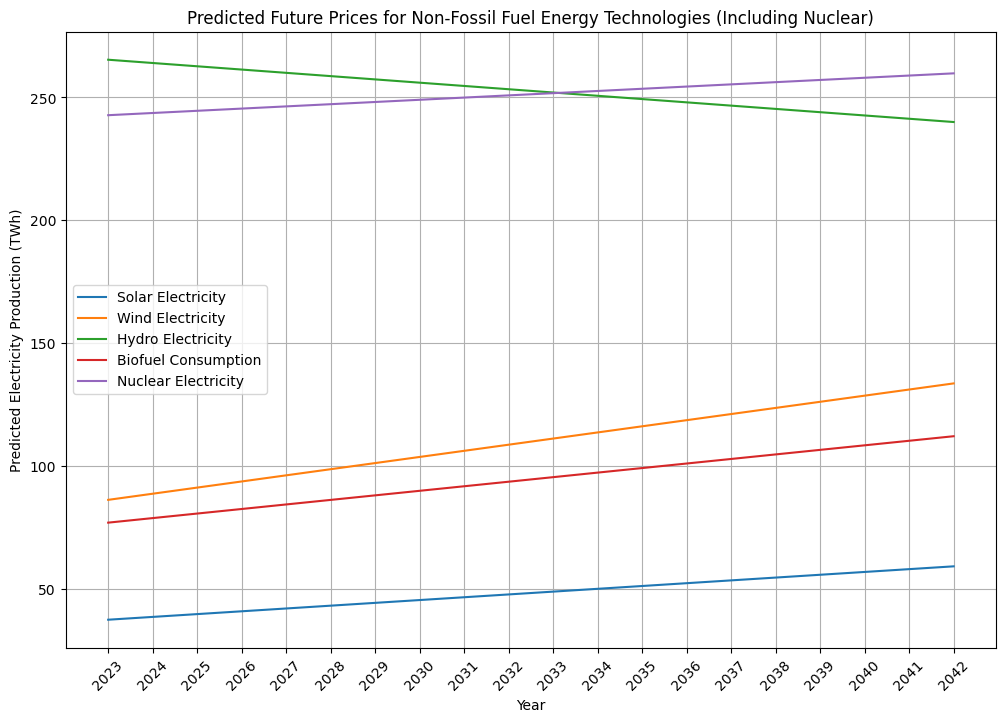

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
energy_data_path = 'owid-energy-data.csv'
levelized_cost_data_path = 'levelized-cost-of-energy.csv'

energy_data = pd.read_csv(energy_data_path)
levelized_cost_data = pd.read_csv(levelized_cost_data_path)

# Relevant columns for non-fossil fuel energy technologies
non_fossil_cols_with_nuclear = [
    'year', 'country', 'solar_electricity', 'wind_electricity', 'hydro_electricity', 
    'biofuel_consumption', 'nuclear_electricity'
]

# Extract relevant columns and drop rows with any NaN values
energy_data_filtered_with_nuclear = energy_data[non_fossil_cols_with_nuclear].dropna().copy()

# Convert all relevant columns to float (except 'year' and 'country' which should remain as int and str respectively)
for col in non_fossil_cols_with_nuclear:
    if col not in ['year', 'country']:
        energy_data_filtered_with_nuclear[col] = energy_data_filtered_with_nuclear[col].astype(float)

# Prepare data for linear regression (including nuclear)
def prepare_data_for_regression_with_nuclear(df, energy_type):
    X = df['year'].values.reshape(-1, 1)
    y = df[energy_type].values
    return X, y

# Fit linear regression model and predict future values (including nuclear)
def fit_predict_model_with_nuclear(X, y, future_years=20):
    model = LinearRegression()
    model.fit(X, y)
    future_X = np.arange(X[-1, 0] + 1, X[-1, 0] + 1 + future_years).reshape(-1, 1)
    future_y = model.predict(future_X)
    return model, future_X, future_y

# Apply the process for each energy type (including nuclear)
energy_types_with_nuclear = [
    'solar_electricity', 'wind_electricity', 'hydro_electricity', 
    'biofuel_consumption', 'nuclear_electricity'
]
models_with_nuclear = {}
predictions_with_nuclear = {}

for energy_type in energy_types_with_nuclear:
    X, y = prepare_data_for_regression_with_nuclear(energy_data_filtered_with_nuclear, energy_type)
    model, future_X, future_y = fit_predict_model_with_nuclear(X, y)
    models_with_nuclear[energy_type] = model
    predictions_with_nuclear[energy_type] = (future_X, future_y)

# Generate historical and future predictions plots (including nuclear)
plt.figure(figsize=(16, 10))

for i, energy_type in enumerate(energy_types_with_nuclear):
    plt.subplot(3, 2, i+1)
    plt.scatter(energy_data_filtered_with_nuclear['year'], energy_data_filtered_with_nuclear[energy_type], label='Historical Data')
    plt.plot(predictions_with_nuclear[energy_type][0], predictions_with_nuclear[energy_type][1], color='red', label='Predicted Data')
    plt.xlabel('Year')
    plt.ylabel(f'{energy_type.replace("_", " ").title()} (TWh)')
    plt.title(f'Historical and Predicted {energy_type.replace("_", " ").title()}')
    plt.legend()

plt.tight_layout()
plt.show()

# Extract future predictions for comparison (including nuclear)
future_years_with_nuclear = predictions_with_nuclear[energy_types_with_nuclear[0]][0]
future_predictions_with_nuclear = {et: predictions_with_nuclear[et][1] for et in energy_types_with_nuclear}

# Create a DataFrame for easier plotting (including nuclear)
comparison_df_with_nuclear = pd.DataFrame(future_predictions_with_nuclear, index=future_years_with_nuclear.flatten())

# Generate comparison plot with corrected x-axis labels (including nuclear)
plt.figure(figsize=(12, 8))
for energy_type in energy_types_with_nuclear:
    plt.plot(comparison_df_with_nuclear.index, comparison_df_with_nuclear[energy_type], label=energy_type.replace('_', ' ').title())

plt.xlabel('Year')
plt.ylabel('Predicted Electricity Production (TWh)')
plt.title('Predicted Future Prices for Non-Fossil Fuel Energy Technologies (Including Nuclear)')
plt.legend()
plt.grid(True)
plt.xticks(ticks=comparison_df_with_nuclear.index, labels=comparison_df_with_nuclear.index, rotation=45)
plt.show()